In [17]:
# Project 2:
# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [18]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR =r"C:\Users\palle\OneDrive\Desktop\archive (4)\train\daisy"
FLOWER_SUNFLOWER_DIR =r"C:\Users\palle\OneDrive\Desktop\archive (4)\train\sunflower"
FLOWER_TULIP_DIR = r"C:\Users\palle\OneDrive\Desktop\archive (4)\train\tulip"
FLOWER_DANDI_DIR =r"C:\Users\palle\OneDrive\Desktop\archive (4)\train\dandelion"
FLOWER_ROSE_DIR = r"C:\Users\palle\OneDrive\Desktop\archive (4)\train\rose"

In [5]:
def assign_label(img, flower_type):
  return flower_type

In [19]:
# tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    Z.append(str(label))

In [20]:
make_train_data('Daisy', FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 66/66 [00:00<00:00, 310.08it/s]

66


In [21]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:01<00:00, 320.86it/s]

561


In [22]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 610/610 [00:01<00:00, 318.38it/s]

1171


In [23]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 656/656 [00:01<00:00, 354.99it/s]

1827


In [24]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:01<00:00, 334.91it/s]

2324


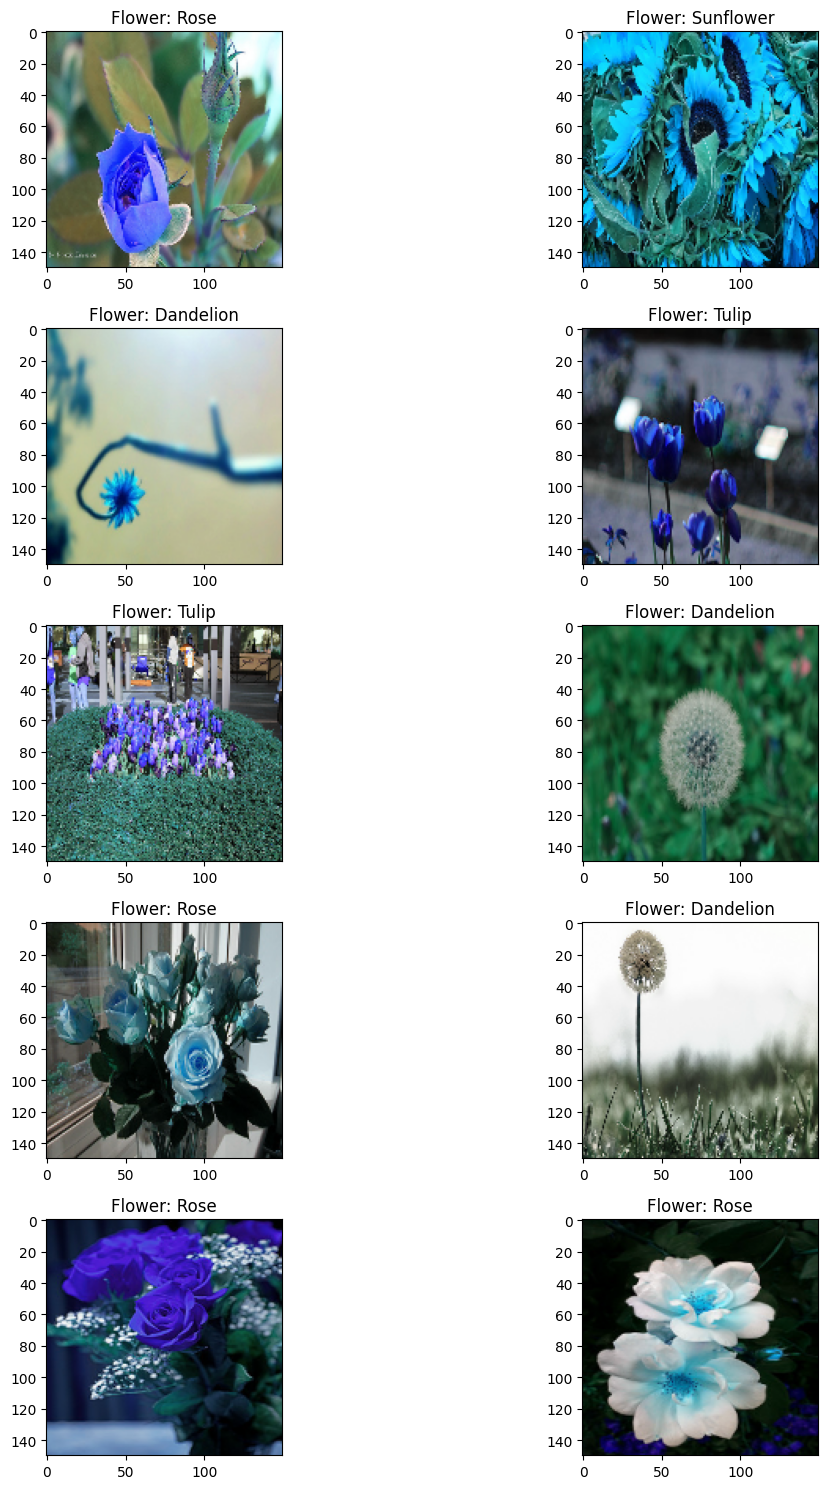

In [25]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()

In [26]:
# Encoding all the flower names
from sklearn.preprocessing import LabelEncoder as le
le= LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 5)
X = np.array(X)
X= X/255
# X -> contains all the image array
#Y --> contains all the image names
print(X)

[[[[0.87843137 0.84705882 0.84313725]
   [0.8627451  0.83529412 0.81960784]
   [0.88627451 0.85098039 0.83921569]
   ...
   [0.05490196 0.03529412 0.03529412]
   [0.06666667 0.04313725 0.04705882]
   [0.04705882 0.02745098 0.03137255]]

  [[0.88235294 0.85098039 0.84705882]
   [0.90588235 0.8745098  0.86666667]
   [0.87843137 0.84705882 0.84313725]
   ...
   [0.05882353 0.04705882 0.05098039]
   [0.05098039 0.02745098 0.03529412]
   [0.04705882 0.03137255 0.02745098]]

  [[0.92156863 0.89019608 0.89019608]
   [0.90588235 0.8745098  0.8627451 ]
   [0.89803922 0.8745098  0.87058824]
   ...
   [0.0627451  0.05490196 0.05490196]
   [0.05098039 0.02745098 0.03529412]
   [0.03137255 0.01568627 0.01176471]]

  ...

  [[0.71372549 0.69019608 0.69411765]
   [0.7372549  0.71764706 0.72156863]
   [0.79215686 0.77647059 0.76078431]
   ...
   [0.54117647 0.60392157 0.62745098]
   [0.62352941 0.6627451  0.68235294]
   [0.65098039 0.6745098  0.71372549]]

  [[0.86666667 0.84705882 0.83137255]
   [0.8

In [27]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [28]:
print(Z)

['Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'Sunflower', 'S

In [29]:
#set random seed
np.random.seed(42)
rn.seed(42)


tf.random.set_seed(42)

In [32]:
#building the model
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


# 1 2 3 4
# 5 6 7 8
# 9 10 11 12
# 13 14 15 16


#MaxPooling2D--->2x2

#6 8
#14 16


model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))



model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))





In [33]:
#adjest the learning rate
batch_size=128
epochs=50
from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0)

In [38]:
#to prevent overfitting
datagen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(x_train)

In [39]:
#compile keras model
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)       

In [40]:
# Fitting on training and making predictions
History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                            epochs=epochs,validation_data=(x_test,y_test),
                            verbose=1,steps_per_epoch=x_train.shape[0]//batch_size)


C:\Users\palle\AppData\Local\Temp\ipykernel_20120\243069462.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),


Epoch 1/50



13/13 [==============================] - 18s 1s/step - loss: 1.5834 - accuracy: 0.3672 - val_loss: 1.1156 - val_accuracy: 0.5439
Epoch 2/50
13/13 [==============================] - 16s 1s/step - loss: 1.1759 - accuracy: 0.4929 - val_loss: 1.0725 - val_accuracy: 0.5680
Epoch 3/50
13/13 [==============================] - 17s 1s/step - loss: 1.0660 - accuracy: 0.5554 - val_loss: 1.0146 - val_accuracy: 0.6265
Epoch 4/50
13/13 [==============================] - 16s 1s/step - loss: 0.9963 - accuracy: 0.5988 - val_loss: 1.1099 - val_accuracy: 0.5783
Epoch 5/50
13/13 [==============================] - 16s 1s/step - loss: 0.9432 - accuracy: 0.6050 - val_loss: 0.9583 - val_accuracy: 0.6386
Epoch 6/50
13/13 [==============================] - 16s 1s/step - loss: 0.9002 - accuracy: 0.6303 - val_loss: 0.9387 - val_accuracy: 0.6282
Epoch 7/50
13/13 [==============================] - 18s 1s/step - loss: 0.9312 - accuracy: 0.6359 - val_loss: 0.9067 - val_accuracy: 0.6299
Epoch 8/50
13/13 [=============